In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and preprocess the insurance dataset.

    Steps:
    - Replace empty strings with NaN globally
    - Convert numeric columns to proper types
    - Strip and lowercase categorical columns
    - Fill 'medical_history' and 'family_medical_history' NaNs with 'none'
    - Drop rows with missing values in essential fields
    """

    # Replace empty strings or whitespace with NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Define column groups
    numeric_cols = ['age', 'bmi', 'children', 'charges']
    categorical_cols = ['gender', 'smoker', 'region', 'medical_history',
                        'family_medical_history', 'exercise_frequency',
                        'occupation', 'coverage_level']

    # Convert numeric columns safely
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Strip spaces and lowercase for categorical columns
    for col in categorical_cols:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # Fill missing medical history fields with 'none'
    df['medical_history'] = df['medical_history'].fillna('none')
    df['family_medical_history'] = df['family_medical_history'].fillna('none')

    # Drop rows with missing values in essential fields
    essential_cols = numeric_cols + [col for col in categorical_cols if col not in ['medical_history', 'family_medical_history']]
    df.dropna(subset=essential_cols, inplace=True)

    return df

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('Database.db')
df = pd.read_sql_query('Select * from Insurance_Prediction' , conn)
conn.close()

# Preprocess
df_cleaned  = preprocess_data(df)
df_cleaned.head() 

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,diabetes,nan,never,blue collar,premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,diabetes,high blood pressure,occasionally,white collar,premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,nan,high blood pressure,occasionally,blue collar,premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,nan,diabetes,rarely,white collar,standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,diabetes,high blood pressure,rarely,white collar,standard,19268.309838


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929240 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     929240 non-null  float64
 1   gender                  929240 non-null  object 
 2   bmi                     929240 non-null  float64
 3   children                929240 non-null  float64
 4   smoker                  929240 non-null  object 
 5   region                  929240 non-null  object 
 6   medical_history         929240 non-null  object 
 7   family_medical_history  929240 non-null  object 
 8   exercise_frequency      929240 non-null  object 
 9   occupation              929240 non-null  object 
 10  coverage_level          929240 non-null  object 
 11  charges                 929240 non-null  float64
dtypes: float64(4), object(8)
memory usage: 92.2+ MB


In [4]:
df_cleaned.describe()

,age,bmi,children,charges
count,929240.000000,929240.000000,929240.000000,929240.000000
mean,41.493872,34.005855,2.500096,16733.259484
std,13.854955,9.234034,1.707640,4415.979017
min,18.000000,18.000000,0.000000,3445.011643
25%,30.000000,26.020000,1.000000,13599.752363
50%,41.000000,34.000000,3.000000,16619.192072
75%,53.000000,41.990000,4.000000,19779.875208
max,65.000000,50.000000,5.000000,32561.560374


In [5]:
df_cleaned.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [6]:
df_cleaned.nunique()

age                           48
gender                         3
bmi                         3201
children                       6
smoker                         2
region                         4
medical_history                4
family_medical_history         4
exercise_frequency             4
occupation                     4
coverage_level                 3
charges                   929240
dtype: int64

In [7]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df_cleaned[col].unique()}")
    print()

gender: ['male' 'female' 'nan']

smoker: ['yes' 'no']

region: ['southeast' 'northwest' 'southwest' 'northeast']

medical_history: ['diabetes' 'nan' 'high blood pressure' 'heart disease']

family_medical_history: ['nan' 'high blood pressure' 'diabetes' 'heart disease']

exercise_frequency: ['never' 'occasionally' 'rarely' 'frequently']

occupation: ['blue collar' 'white collar' 'student' 'unemployed']

coverage_level: ['premium' 'standard' 'basic']



In [8]:
categorical_cols = ['gender', 'smoker', 'region', 'medical_history',
                    'family_medical_history', 'exercise_frequency',
                    'occupation', 'coverage_level']

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df_cleaned[col].value_counts())


gender value counts:
gender
male      453482
female    453429
nan        22329
Name: count, dtype: int64

smoker value counts:
smoker
yes    464685
no     464555
Name: count, dtype: int64

region value counts:
region
northeast    232835
southwest    232429
northwest    232168
southeast    231808
Name: count, dtype: int64

medical_history value counts:
medical_history
nan                    233007
high blood pressure    232303
heart disease          232181
diabetes               231749
Name: count, dtype: int64

family_medical_history value counts:
family_medical_history
nan                    232624
heart disease          232319
high blood pressure    232267
diabetes               232030
Name: count, dtype: int64

exercise_frequency value counts:
exercise_frequency
rarely          232686
occasionally    232447
frequently      232156
never           231951
Name: count, dtype: int64

occupation value counts:
occupation
unemployed      232972
student         232701
blue collar     232033

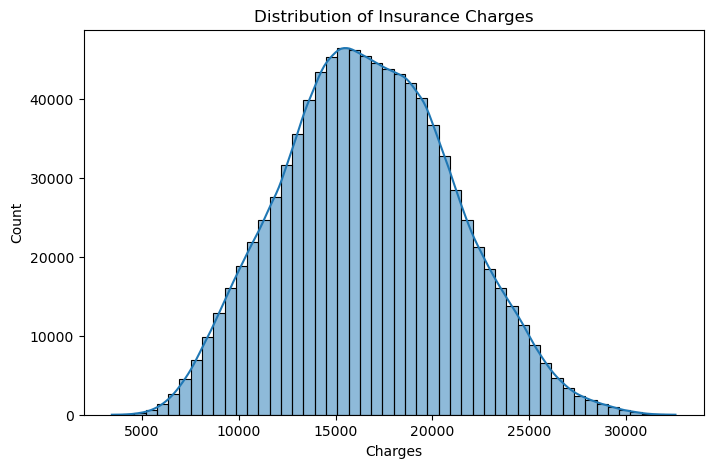

In [9]:
# 5. Target Distribution
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['charges'], kde=True, bins=50)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

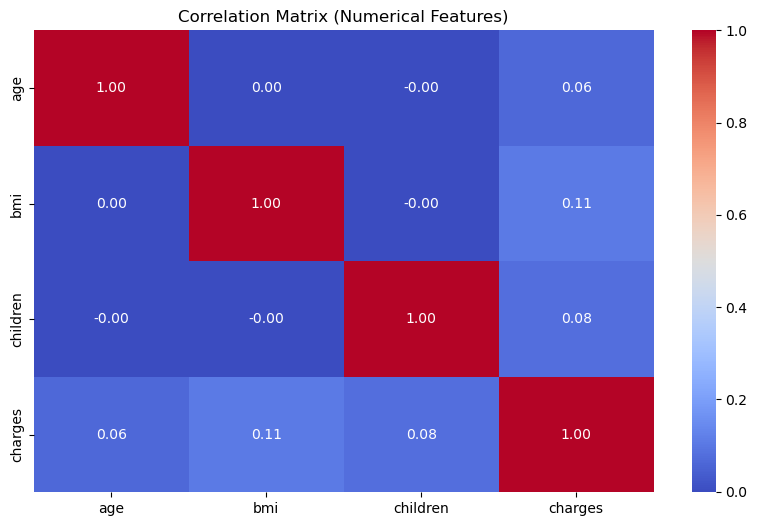

In [10]:
# 6. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

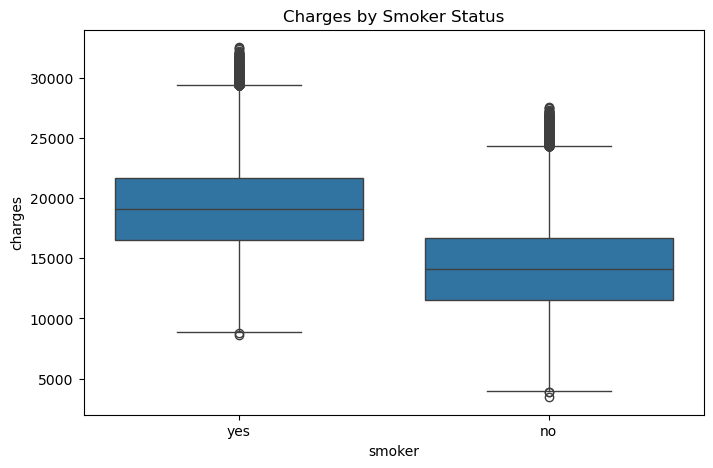

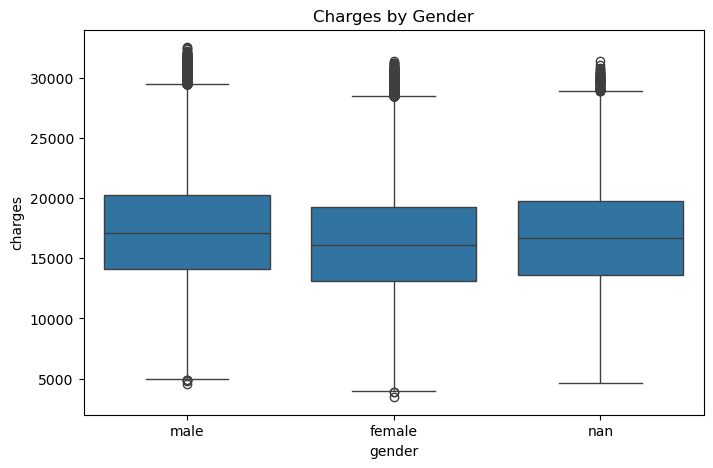

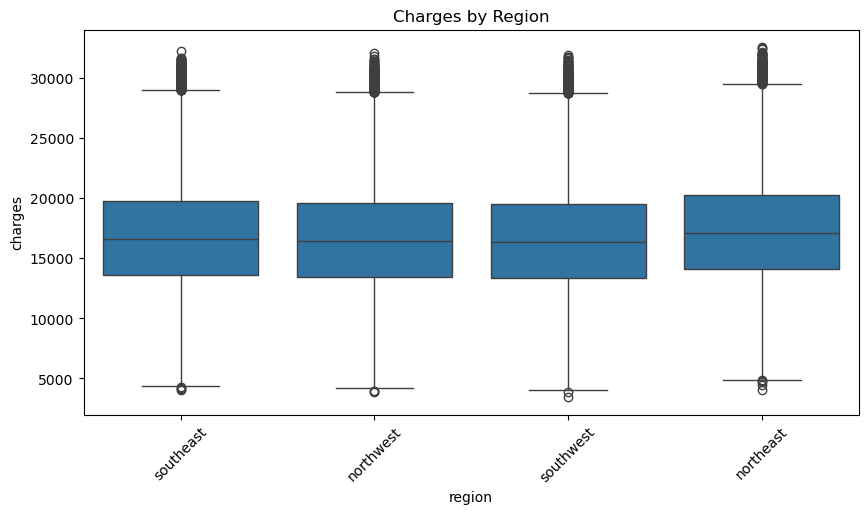

In [11]:
# 7. Categorical Analysis (Smoker, Gender, Region)
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df_cleaned)
plt.title("Charges by Smoker Status")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='charges', data=df_cleaned)
plt.title("Charges by Gender")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='region', y='charges', data=df_cleaned)
plt.title("Charges by Region")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sharath Babu Kurva\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


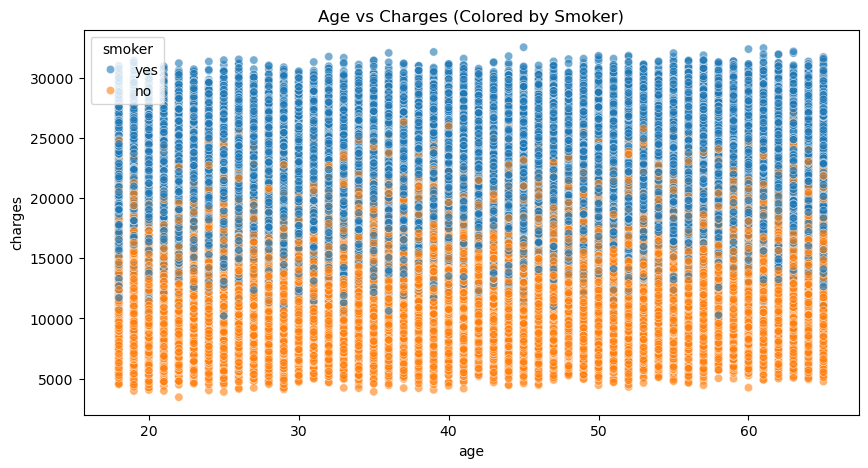

In [12]:
# 8. Age vs Charges
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='charges', data=df_cleaned, hue='smoker', alpha=0.6)
plt.title("Age vs Charges (Colored by Smoker)")
plt.show()

C:\Users\Sharath Babu Kurva\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


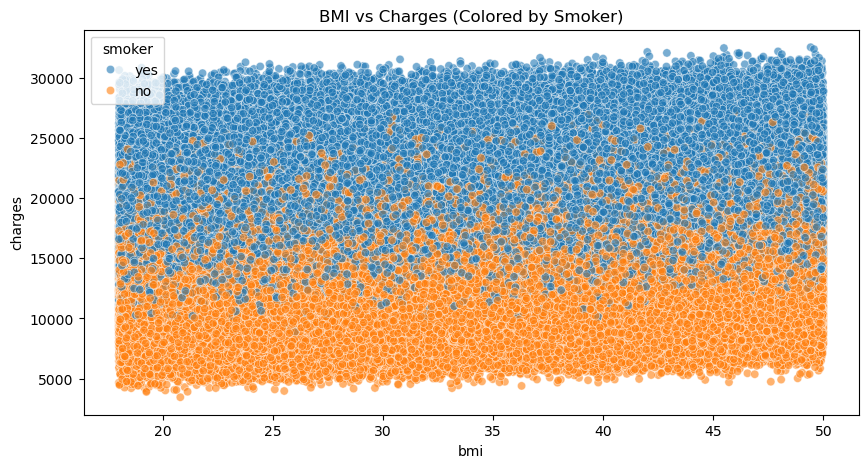

In [13]:
# 9. BMI vs Charges
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y='charges', data=df_cleaned, hue='smoker', alpha=0.6)
plt.title("BMI vs Charges (Colored by Smoker)")
plt.show()

In [14]:
# Assume `df_cleaned` is the result from preprocess_data(df)

# Ensure the data is sorted or shuffled as needed before splitting
df_cleaned = df_cleaned.reset_index(drop=True)

# Split
train_df = df_cleaned.iloc[:700_000]
val_df = df_cleaned.iloc[700_000:900_000]
prod_df = df_cleaned.iloc[900_000:]

# Confirm shapes
print(f"Train set: {train_df.shape}")
print(f"Validation set: {val_df.shape}")
print(f"Production set: {prod_df.shape}")


Train set: (700000, 12)
Validation set: (200000, 12)
Production set: (29240, 12)


In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
'''Encoding Categorical Features
Since we’re using RandomForestRegressor, we don’t need one-hot encoding — we can use Ordinal Encoding (or even Label Encoding) as it works well 
with tree-based models.'''

'Encoding Categorical Features\nSince we’re using RandomForestRegressor, we don’t need one-hot encoding — we can use Ordinal Encoding (or even Label Encoding) as it works well \nwith tree-based models.'

In [16]:
# Define feature columns
target_col = 'charges'
categorical_cols = ['gender', 'smoker', 'region', 'medical_history',
                    'family_medical_history', 'exercise_frequency',
                    'occupation', 'coverage_level']

numeric_cols = ['age', 'bmi', 'children']
feature_cols = numeric_cols + categorical_cols

# Separate features and target
X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_val = val_df[feature_cols]
y_val = val_df[target_col]

# Fit OrdinalEncoder on training data
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = encoder.transform(X_val[categorical_cols])

# Combine numeric + encoded categorical
X_train_final = pd.concat([X_train[numeric_cols].reset_index(drop=True),
                           pd.DataFrame(X_train_encoded, columns=categorical_cols)], axis=1)

X_val_final = pd.concat([X_val[numeric_cols].reset_index(drop=True),
                         pd.DataFrame(X_val_encoded, columns=categorical_cols)], axis=1)


In [17]:
# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_final, y_train)

# Predict
y_pred = rf.predict(X_val_final)


In [18]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")


MAE: 307.36
RMSE: 378.50
R^2 Score: 0.9926


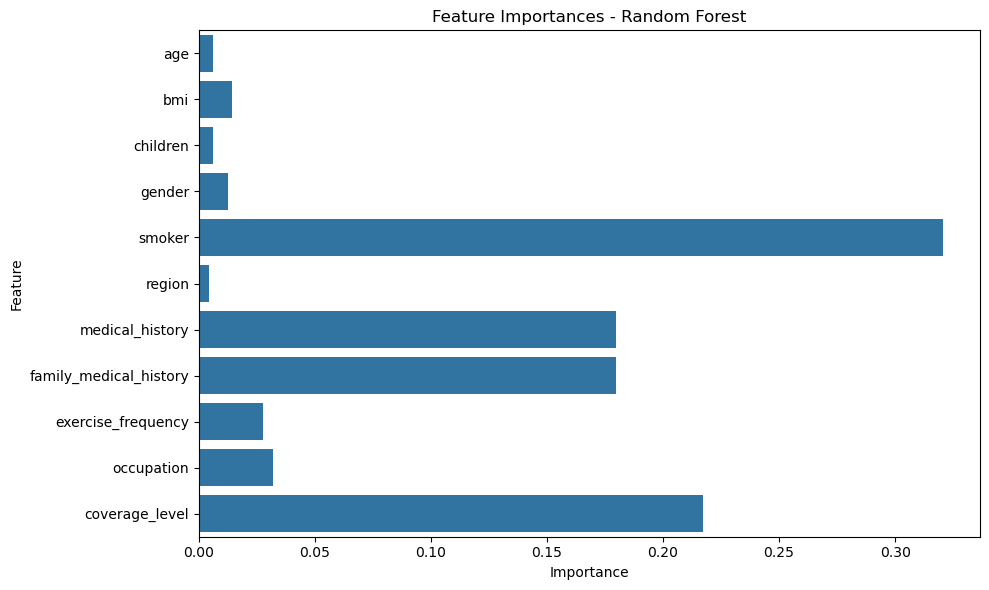

In [19]:
importances = rf.feature_importances_
features = X_train_final.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
